# Tanque aquecido

![Tanques](./tanque_area_variavel.png)

**Equacionamento**:

$\frac{dh}{dt} = \frac{1}{\beta(h)}\cdot\left(q_\text{in} - k \cdot \sqrt{\rho\cdot g\cdot h}\right)$

$\frac{dT}{dt} = \frac{q_\text{in}}{V(h)}\cdot\left(T_\text{in}-T\right)+ \frac{U_\text{t} \cdot A_\text{t}}{\rho\cdot V(h) \cdot c_p}\cdot(T_c-T)$

$\frac{dT_\text{c}}{dt} = \frac{q_\text{c}}{V_\text{c}}\cdot\left(T_{\text{c}_\text{in}}-T_\text{c}\right)+ \frac{U_\text{t} \cdot A_\text{t}}{\rho_\text{c}\cdot V_\text{c} \cdot c_{p_\text{c}}}\cdot(T-T_\text{c})$

$\beta(h) = \frac{dV}{dh}$

$V(h)= \frac{\pi\cdot\gamma^2}{3}\cdot\left(h+\frac{B/2}{\gamma}\right)^3-\frac{\pi\cdot(B/2)^3}{3\cdot\gamma}$

$\gamma = \frac{A/2 - B/2}{h_M}$

**Variáveis**:

- Fluido presente dentro do tanque: água

- Tanque:

  - $A$ -> diâmetro superior (m)
  
  - $B$ -> diâmetro inferior (m)
  
  - $h_M$ -> altura máxima (m)
  
  - $V(h)$ -> volume em função da altura (m^3)
  
  - $h$ -> altura (m)
  
  - $\rho$ -> densidade do fluido do tanque (kg/m$^3$)
  
  - $g$ -> aceleração da gravidade (m/s$^2$)
  
  - $k$ -> constante de descarga do tanque 
  
  - $U_\text{t} \cdot A_{t} $ -> coeficiente global de troca térmica (kJ/s)
  
  - $c_\text{p}$ -> capacidade calorífica do fluido do tanque (kJ/kg)
  
  - $q_\text{in}$ -> vazão da bomba (m$^3$/s)
  
  - $T_\text{in}$ -> temperatura do fluido entrada no tanque (C)
  
  - $T$ -> temperatura no interior do tanque (C)
  
- Camisa:
 
  - $V_\text{c}$ -> volume da camisa (m^$3$)

  - $c_{\text{p}_\text{c}}$ -> capacidade calorífica do fluido da camisa (kJ/kg)

  - $\rho_\text{c}$ -> densidade do fluido do tanque (kg/m$^3$)

  - $q_\text{c}$ -> vazão do fluido de aquecimento (m$^3$/s)

  - $T_{\text{c}_\text{in}}$ -> temperatura de entrada no tanque (C)

  - $T_\text{c}$ -> temperatura no interior da camisa (C)




In [1]:
# Importação de pacotes
import serial

from numpy import linspace, array, hstack

## Pacotes que permitem manipular como os gráficos aparecem neste notebook
from matplotlib.pyplot import figure, tight_layout
from IPython import display
from ipywidgets.widgets.interaction import show_inline_matplotlib_plots

In [2]:
# Gráfico

def grafico(h,T,Tc,qin,qc,Tin,Tcin,instanteTempo):
    
    fig = figure(figsize=(8,4))
    
    ax = fig.add_subplot(1, 3, 1)
    ax.plot([0, 0], [0, 2], 'k-', [1, 1], [0, 2], 'k-')
    ax.plot([0, 1],[float(h), float(h)],'b-')
    ax.set_ylabel('h')
    ax.set_ylim(0,2)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(True)
    
    ax = fig.add_subplot(1, 3, 2)
    ax.plot([0, 0], [20, 60], 'k-',[1, 1], [0, 60], 'k-')
    ax.plot([0, 1], [float(T), float(T)], 'b-')
    ax.set_ylabel('T')
    ax.set_ylim(20,60)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(True) 
    
    ax = fig.add_subplot(1, 3, 3)
    ax.plot([0, 0], [20, 60], 'k-',[1, 1], [0, 60], 'k-')
    ax.plot([0, 1], [float(Tc), float(Tc)], 'b-')
    ax.set_ylabel('Tc')
    ax.set_ylim(20,60)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(True) 
    
    ax.text(1.2, 38, 'Tempo: {:.2f} s'.format(instanteTempo), fontsize=14, verticalalignment='top',)
    ax.text(1.2, 30, 'qin: {:.2f} m$^3$ | qc: {:.2f} m$^3$'.format(float(qin), float(qc)), fontsize=14, verticalalignment='top',)
    ax.text(1.2, 22, 'Tin: {:.2f} C | Tcin: {:.2f} C'.format(float(Tin), float(Tcin)), fontsize=14, verticalalignment='top',)
    
    tight_layout()

def grafico_tendencia(h,T,Tc,qin,qc,Tin,Tcin,namostra):

    tempo = linspace(0,(namostra-1)*Ts,namostra)

    fig = figure(figsize=(10,5))
    axes = fig.add_subplot(4,1,1)
    axes.plot(tempo,h,'.-')
    axes.set_ylabel('$h$/ m')
    axes.get_xaxis().set_visible(False)

    axes = fig.add_subplot(4,1,2)
    axes.plot(tempo,T,'.-')
    axes.set_ylabel('$T$ / C')
    axes.get_xaxis().set_visible(False)

    axes = fig.add_subplot(4,1,3)
    axes.plot(tempo,Tc,'.-')
    axes.set_ylabel('$Tc$ / C')
    axes.set_xlabel('tempo /s')

    fig = figure(figsize=(10,5))
    axes = fig.add_subplot(4,1,1)
    axes.plot(tempo,qin,'.-')
    axes.set_ylabel('$qin$/ m')
    axes.get_xaxis().set_visible(False)

    axes = fig.add_subplot(4,1,2)
    axes.plot(tempo,qc,'.-')
    axes.set_ylabel('$qc$ / m3/s')
    axes.get_xaxis().set_visible(False)

    axes = fig.add_subplot(4,1,3)
    axes.plot(tempo,Tin,'.-')
    axes.set_ylabel('$Tin$ / C')
    axes.get_xaxis().set_visible(False)

    axes = fig.add_subplot(4,1,4)
    axes.plot(tempo,Tcin,'.-')
    axes.set_ylabel('$Tcin$ / C')
    axes.set_xlabel('tempo /s')
    
    tight_layout()


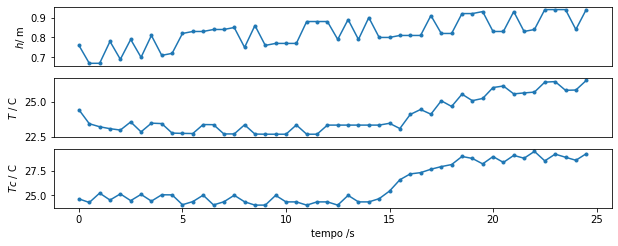

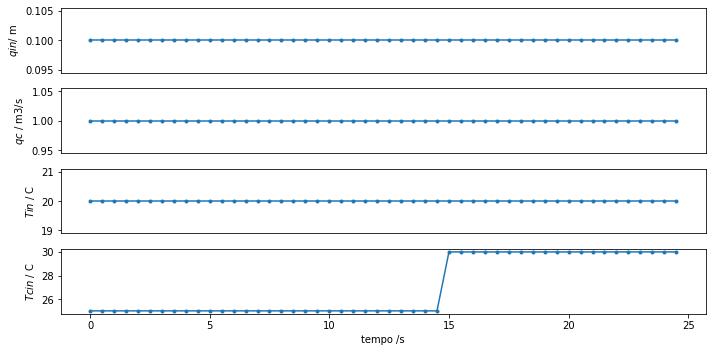

In [3]:
ser = serial.Serial('COM3', 9600)  # Establish the connection on a specific port

nsim = 50 # Quantidade total de amostras

Ts = 0.5 # Período de amostragem [s]

# Condições iniciais

h0 = 0.75
T0 = 25.
Tc0 = 25.

# Variáveis exógenas
qin = [0.1]*200
[qin.append(1.) for it in range(20)]
[qin.append(1.) for it in range(20)]

qc = [1.]*120
[qc.append(2.) for it in range(200)]
[qc.append(1.) for it in range(20)]

Tin = [20.]*200
[Tin.append(20.) for it in range(20)]
[Tin.append(20.) for it in range(20)]

Tcin = [25.]*30
[Tcin.append(30.) for it in range(50)]
[Tcin.append(60.) for it in range(200)]

# Iniciando listas
h = []
T = []
Tc = []
qin_ = []
qout_ = []
qc_ = []
Tc_ = []
Tin_ = []
Tcin_ = []

# Comunicação
x = ser.readline()
print(x)

#Escrevendo condicoes inicias
ser.write(bytearray('{:.2f};{:.2f};{:.2f}'.format(h0,T0,Tc0),'ASCII'))

# Simulando...
for it in range(nsim):
    ser.write(bytearray('{:.1f};{:.2f};{:.2f};{:.2f};{:.2f};{:.2f}\n'.format(1,qin[it],qc[it],Tin[it],Tcin[it],Ts),'ASCII'))
    
    x = ser.readline().decode("utf-8")
    
    data = x.split('&')

    h.append(float(data[0]))
    T.append(float(data[1]))
    Tc.append(float(data[2]))    
    qin_.append(float(data[3]))
    qc_.append(float(data[4]))
    Tin_.append(float(data[5]))
    Tcin_.append(float(data[6]))
    print(it)
    # mostrando a figura
    # 
    #grafico(*data,it*Ts)
    # OU
    grafico_tendencia(h,T,Tc,qin_,qc_,Tin_,Tcin_,it+1)
    display.clear_output(wait=True)
    show_inline_matplotlib_plots()
    
ser.close() # Fechando a conexão com o arduino através da porta serial

In [9]:
ser.close()